# Data 

In [1]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
import matplotlib.pyplot as plt 
plt.rc("font", size=14)
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import seaborn as sns
sns.set(style="white")
sns.set(style="whitegrid", color_codes=True)
from datetime import datetime 
start_time = datetime.now() 

In [2]:
data = pd.read_csv('HR_comma_sep.csv')
data = data.dropna()
print(data.shape)
print(list(data.columns))

(14999, 10)
['satisfaction_level', 'last_evaluation', 'number_project', 'average_montly_hours', 'time_spend_company', 'Work_accident', 'promotion_last_5years', 'department', 'salary', 'y']


In [3]:
data.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,department,salary,y
0,0.38,0.53,2,157,3,0,0,sales,low,1
1,0.80,0.86,5,262,6,0,0,sales,medium,1
2,0.11,0.88,7,272,4,0,0,sales,medium,1
3,0.72,0.87,5,223,5,0,0,sales,low,1
4,0.37,0.52,2,159,3,0,0,sales,low,1


In [4]:
data['department'].unique()

array(['sales', 'accounting', 'hr', 'technical', 'support', 'management',
       'IT', 'product_mng', 'marketing', 'RandD'], dtype=object)

In [5]:
data['department']=np.where(data['department'] =='support', 'technical', data['department'])
data['department']=np.where(data['department'] =='IT', 'technical', data['department'])
data['department'].unique()

array(['sales', 'accounting', 'hr', 'technical', 'management',
       'product_mng', 'marketing', 'RandD'], dtype=object)

# Data exploration

In [6]:
data['y'].value_counts()

0    11428
1     3571
Name: y, dtype: int64

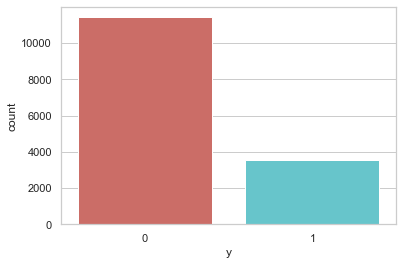

<Figure size 432x288 with 0 Axes>

In [7]:
sns.countplot(x='y', data=data, palette='hls')
plt.show()
plt.savefig('count_plot')

In [8]:
count_no_churn = len(data[data['y']==0])
count_churn = len(data[data['y']==1])
pct_of_no_churn = count_no_churn/(count_no_churn+count_churn)
print("\033[1m percentage of no churn is", pct_of_no_churn*100)
pct_of_churn = count_churn/(count_no_churn+count_churn)
print("\033[1m percentage of churn", pct_of_churn*100)

 percentage of no churn is 76.19174611640777
 percentage of churn 23.80825388359224


In [9]:
data.groupby('y').mean()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years
y,,,,,,,
0,0.666810,0.715473,3.786664,199.060203,3.380032,0.175009,0.026251
1,0.440098,0.718113,3.855503,207.419210,3.876505,0.047326,0.005321


In [10]:
data.groupby('department').mean()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,y
department,,,,,,,,
RandD,0.619822,0.712122,3.853875,200.800508,3.367217,0.170267,0.034307,0.153748
accounting,0.582151,0.717718,3.825293,201.162973,3.522816,0.125163,0.018253,0.265971
hr,0.598809,0.708850,3.654939,198.684709,3.355886,0.120433,0.020298,0.290934
management,0.621349,0.724000,3.860317,201.249206,4.303175,0.163492,0.109524,0.144444
marketing,0.618601,0.715886,3.687646,199.385781,3.569930,0.160839,0.050117,0.236597
product_mng,0.619634,0.714756,3.807095,199.965632,3.475610,0.146341,0.000000,0.219512
sales,0.614447,0.709717,3.776329,200.911353,3.534058,0.141787,0.024155,0.244928
technical,0.613687,0.720976,3.839054,201.813795,3.416127,0.144106,0.008258,0.246924


In [11]:
data.groupby('Work_accident').mean()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,promotion_last_5years,y
Work_accident,,,,,,,
0,0.606833,0.716602,3.805456,201.258613,3.496960,0.018940,0.265160
1,0.648326,0.713144,3.788843,199.818349,3.505763,0.035039,0.077916


In [12]:
data.groupby('promotion_last_5years').mean()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,y
promotion_last_5years,,,,,,,
0,0.611895,0.716321,3.804155,201.076431,3.483719,0.142575,0.241962
1,0.656019,0.706019,3.752351,199.849530,4.166144,0.238245,0.059561


# Visualizations

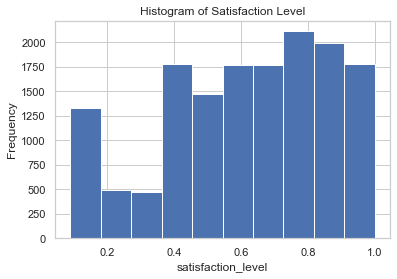

In [13]:
%matplotlib inline
data.satisfaction_level.hist()
plt.title('Histogram of Satisfaction Level')
plt.xlabel('satisfaction_level')
plt.ylabel('Frequency')
plt.savefig('hist_satisfaction_level')

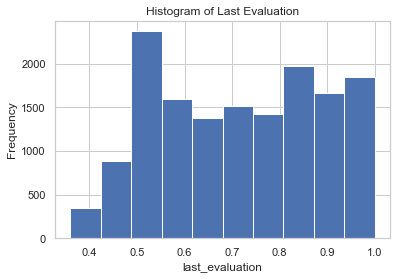

In [14]:
data.last_evaluation.hist()
plt.title('Histogram of Last Evaluation')
plt.xlabel('last_evaluation')
plt.ylabel('Frequency')
plt.savefig('hist_last_evaluation')

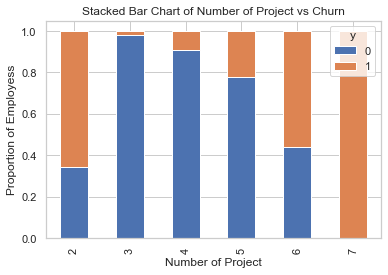

In [15]:
table=pd.crosstab(data.number_project,data.y)
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
plt.title('Stacked Bar Chart of Number of Project vs Churn')
plt.xlabel('Number of Project')
plt.ylabel('Proportion of Employess')
plt.savefig('number_project_vs_churn_stack')

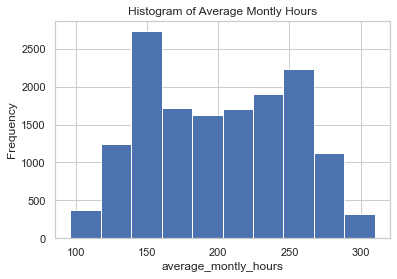

In [16]:
data.average_montly_hours.hist()
plt.title('Histogram of Average Montly Hours')
plt.xlabel('average_montly_hours')
plt.ylabel('Frequency')
plt.savefig('hist_average_montly_hours')

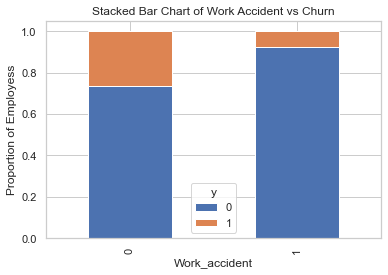

In [17]:
table=pd.crosstab(data.Work_accident,data.y)
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
plt.title('Stacked Bar Chart of Work Accident vs Churn')
plt.xlabel('Work_accident')
plt.ylabel('Proportion of Employess')
plt.savefig('Work_accident_vs_churn_stack')

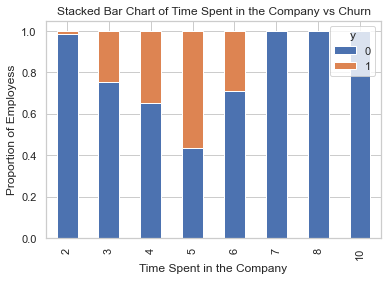

In [18]:
table=pd.crosstab(data.time_spend_company,data.y)
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
plt.title('Stacked Bar Chart of Time Spent in the Company vs Churn')
plt.xlabel('Time Spent in the Company')
plt.ylabel('Proportion of Employess')
plt.savefig('time_spend_company_vs_churn_stack')

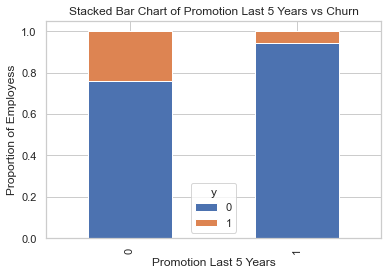

In [19]:
table=pd.crosstab(data.promotion_last_5years,data.y)
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
plt.title('Stacked Bar Chart of Promotion Last 5 Years vs Churn')
plt.xlabel('Promotion Last 5 Years')
plt.ylabel('Proportion of Employess')
plt.savefig('promotion_last_5years_vs_churn_stack')

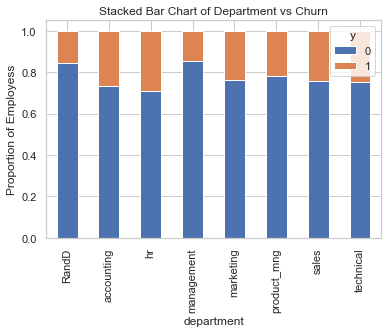

In [20]:
table=pd.crosstab(data.department,data.y)
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
plt.title('Stacked Bar Chart of Department vs Churn')
plt.xlabel('department')
plt.ylabel('Proportion of Employess')
plt.savefig('department_vs_churn_stack')

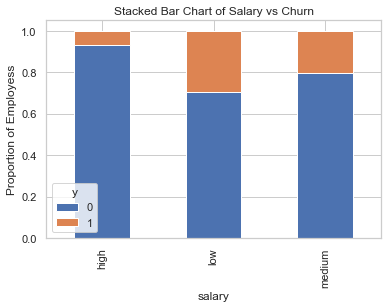

In [21]:
table=pd.crosstab(data.salary,data.y)
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
plt.title('Stacked Bar Chart of Salary vs Churn')
plt.xlabel('salary')
plt.ylabel('Proportion of Employess')
plt.savefig('salary_vs_churn_stack')

# Create dummy variables

In [22]:
cat_vars=['Work_accident','time_spend_company','promotion_last_5years','department','salary']
for var in cat_vars:
    cat_list='var'+'_'+var
    cat_list = pd.get_dummies(data[var], prefix=var)
    data1=data.join(cat_list)
    data=data1
cat_vars=['Work_accident','time_spend_company','promotion_last_5years','department','salary']
data_vars=data.columns.values.tolist()
to_keep=[i for i in data_vars if i not in cat_vars]

In [23]:
data_final=data[to_keep]
data_final.columns.values

array(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'y', 'Work_accident_0', 'Work_accident_1',
       'time_spend_company_2', 'time_spend_company_3',
       'time_spend_company_4', 'time_spend_company_5',
       'time_spend_company_6', 'time_spend_company_7',
       'time_spend_company_8', 'time_spend_company_10',
       'promotion_last_5years_0', 'promotion_last_5years_1',
       'department_RandD', 'department_accounting', 'department_hr',
       'department_management', 'department_marketing',
       'department_product_mng', 'department_sales',
       'department_technical', 'salary_high', 'salary_low',
       'salary_medium'], dtype=object)

# Over-sampling using SMOTE

In [24]:
X = data_final.loc[:, data_final.columns != 'y']
y = data_final.loc[:, data_final.columns == 'y']

from imblearn.over_sampling import SMOTE

os = SMOTE(random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
columns = X_train.columns

os_data_X,os_data_y=os.fit_sample(X_train, y_train)
os_data_X = pd.DataFrame(data=os_data_X,columns=columns )
os_data_y= pd.DataFrame(data=os_data_y,columns=['y'])

# we can Check the numbers of our data
print("\033[1m Length of oversampled data is ",len(os_data_X))
print("\033[1m Number of no churn in oversampled data",len(os_data_y[os_data_y['y']==0]))
print("\033[1m Number of churn",len(os_data_y[os_data_y['y']==1]))
print("\033[1m Proportion of no churn data in oversampled data is ",len(os_data_y[os_data_y['y']==0])/len(os_data_X))
print("\033[1m Proportion of churn data in oversampled data is ",len(os_data_y[os_data_y['y']==1])/len(os_data_X))

 Length of oversampled data is  15318
 Number of no churn in oversampled data 7659
 Number of churn 7659
 Proportion of no churn data in oversampled data is  0.5
 Proportion of churn data in oversampled data is  0.5


# Dimensionality Reduction

In [25]:
import itertools

l = itertools.combinations([1,2,3,4],3)
for i in l:
    print(i)

(1, 2, 3)
(1, 2, 4)
(1, 3, 4)
(2, 3, 4)


In [26]:
os_data_X.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'Work_accident_0', 'Work_accident_1',
       'time_spend_company_2', 'time_spend_company_3', 'time_spend_company_4',
       'time_spend_company_5', 'time_spend_company_6', 'time_spend_company_7',
       'time_spend_company_8', 'time_spend_company_10',
       'promotion_last_5years_0', 'promotion_last_5years_1',
       'department_RandD', 'department_accounting', 'department_hr',
       'department_management', 'department_marketing',
       'department_product_mng', 'department_sales', 'department_technical',
       'salary_high', 'salary_low', 'salary_medium'],
      dtype='object')

In [27]:
os_data_X.shape

(15318, 27)

In [28]:
os_data_X1 = os_data_X.copy()
os_data_y1 = os_data_y.copy()

os_data_X1.rename(columns={'satisfaction_level': "A" ,'last_evaluation': "B" ,'number_project': "C" ,'average_montly_hours': "D",\
                           'Work_accident_0': "E" ,'Work_accident_1': "F" ,'time_spend_company_2': "G" ,'time_spend_company_3': "H",\
                           'time_spend_company_4': "I" ,'time_spend_company_5': "J" ,'time_spend_company_6': "K" ,'time_spend_company_7': "L",\
                           'time_spend_company_8': "M" , 'time_spend_company_10': "N" ,'promotion_last_5years_0': "O" ,'promotion_last_5years_1': "P",\
                           'department_RandD': "Q", 'department_accounting': "R" ,'department_hr': "S" ,'department_management': "T",\
                           'department_marketing': "U" , 'department_product_mng': "V" ,'department_sales': "W" ,'department_technical': "X",\
                           'salary_high': "Y" , 'salary_low': "Z" ,'salary_medium': "a"}, inplace=True)
os_data_X1.columns

Index(['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N',
       'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z', 'a'],
      dtype='object')

In [29]:
os_data_y1.rename(columns={'y': "Target"}, inplace=True)
os_data_y1.columns

Index(['Target'], dtype='object')

In [30]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
for i in range(1,28):
    c = itertools.combinations("ABCDEFGHIJKLMNOPQRSTUVWXYZa",i)
    for item in c:
        ls = list(item) 
        X_train, X_test, y_train, y_test = train_test_split(os_data_X1[ls], os_data_y1['Target'], test_size=0.33,random_state=42)
        model = SVC()
        model.fit(X_train,y_train)
        y_pred = model.predict(X_train)
        y_pred1 = model.predict(X_test)
        accuarcy = accuracy_score(y_train, y_pred)
        accuarcy1 = accuracy_score(y_test, y_pred1)
        # print(ls,accuarcy)             
        if accuarcy1 > 0.90:
            print(ls,"   Accuracy on training set: {:.4%}".format(accuarcy), " Accuracy on test set is: {:.4%}".format(accuarcy1))

['A', 'B', 'H']    Accuracy on training set: 89.3598%  Accuracy on test set is: 90.0890%
['A', 'B', 'C', 'H']    Accuracy on training set: 89.3793%  Accuracy on test set is: 90.0297%
['A', 'B', 'G', 'H']    Accuracy on training set: 90.4609%  Accuracy on test set is: 90.9792%
['A', 'B', 'H', 'I']    Accuracy on training set: 89.3696%  Accuracy on test set is: 90.5045%
['A', 'B', 'H', 'J']    Accuracy on training set: 89.6911%  Accuracy on test set is: 90.3858%
['A', 'B', 'J', 'K']    Accuracy on training set: 89.7398%  Accuracy on test set is: 90.2077%
['B', 'C', 'G', 'H']    Accuracy on training set: 90.8311%  Accuracy on test set is: 91.7507%
['B', 'C', 'H', 'J']    Accuracy on training set: 89.8178%  Accuracy on test set is: 90.6627%


KeyboardInterrupt: 

In [31]:
cols=['last_evaluation','number_project','time_spend_company_2','time_spend_company_3']

X=os_data_X[cols]
y=os_data_y['y']

# Implementing the model

In [32]:
from sklearn.svm import SVC
from sklearn import metrics
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
svc = SVC()
svc.fit(X_train, y_train)

y_pred = svc.predict(X_test)
print('Accuracy of Support Vector Machine Classifier on test set: {:.2f}'.format(svc.score(X_test, y_test)))

Accuracy of Support Vector Machine Classifier on test set: 0.92


# Gridsearch

In [33]:
from sklearn.model_selection import GridSearchCV

In [34]:
param_grid = {'C' : [0.01, 0.1, 1, 10, 100], 'gamma':[0.01, 0.1, 1, 10, 100]      }

In [35]:
grid = GridSearchCV(SVC(), param_grid, refit=True, verbose=2)
grid.fit(X_train, y_train)

Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV] C=0.01, gamma=0.01 ..............................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] ............................... C=0.01, gamma=0.01, total=   2.4s
[CV] C=0.01, gamma=0.01 ..............................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    2.3s remaining:    0.0s


[CV] ............................... C=0.01, gamma=0.01, total=   2.5s
[CV] C=0.01, gamma=0.01 ..............................................
[CV] ............................... C=0.01, gamma=0.01, total=   2.3s
[CV] C=0.01, gamma=0.01 ..............................................
[CV] ............................... C=0.01, gamma=0.01, total=   2.5s
[CV] C=0.01, gamma=0.01 ..............................................
[CV] ............................... C=0.01, gamma=0.01, total=   2.4s
[CV] C=0.01, gamma=0.1 ...............................................
[CV] ................................ C=0.01, gamma=0.1, total=   1.9s
[CV] C=0.01, gamma=0.1 ...............................................
[CV] ................................ C=0.01, gamma=0.1, total=   1.9s
[CV] C=0.01, gamma=0.1 ...............................................
[CV] ................................ C=0.01, gamma=0.1, total=   1.8s
[CV] C=0.01, gamma=0.1 ...............................................
[CV] .

[Parallel(n_jobs=1)]: Done 125 out of 125 | elapsed:  3.5min finished


GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.01, 0.1, 1, 10, 100],
                         'gamma': [0.01, 0.1, 1, 10, 100]},
             verbose=2)

In [36]:
grid.best_params_

{'C': 100, 'gamma': 100}

In [37]:
grid.best_estimator_

SVC(C=100, gamma=100)

# Support Vector Machine Classifier Model Fitting

In [38]:
svc = SVC(C=100, gamma=100, probability=True)
svc.fit(X_train, y_train)

SVC(C=100, gamma=100, probability=True)

In [39]:
y_pred = svc.predict(X_test)
print('Accuracy of Support Vector Machine Classifier on test set: {:.2f}'.format(svc.score(X_test, y_test)))

Accuracy of Support Vector Machine Classifier on test set: 0.93


# Confusion Matrix

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:70: FutureWarning: Pass labels=[1, 0] as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


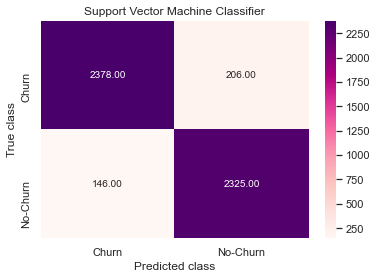

In [40]:
from sklearn.metrics import confusion_matrix
svm_cm = metrics.confusion_matrix(y_pred, y_test, [1,0])
sns.heatmap(svm_cm, annot=True, fmt='.2f',xticklabels = ["Churn","No-Churn"] , yticklabels = ["Churn","No-Churn"], cmap='RdPu')
plt.ylabel('True class')
plt.xlabel('Predicted class')
plt.title('Support Vector Machine Classifier')
plt.savefig('Support_Vector_Machine_Classifier')

In [41]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.94      0.92      0.93      2531
           1       0.92      0.94      0.93      2524

    accuracy                           0.93      5055
   macro avg       0.93      0.93      0.93      5055
weighted avg       0.93      0.93      0.93      5055



# ROC Curve

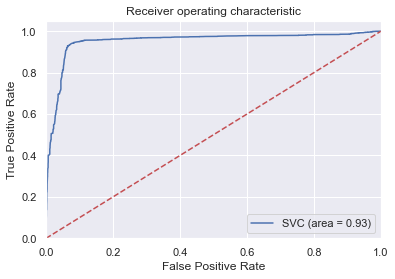

In [42]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
import seaborn as sns
sns.set(style="darkgrid", color_codes=True)

svc_roc_auc = roc_auc_score(y_test, svc.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, svc.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='SVC (area = %0.2f)' % svc_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('svc_ROC')
plt.show()

# Employee’s Turnover Probabilities

In [43]:
df = X_test.copy()
df['True'] = y_test
df['Predicted'] = y_pred
prob = svc.predict_proba(X_test)[:,1]
df['probability'] = prob
df1 = pd.concat([df['True'], df['Predicted'] ,df['probability']], axis=1)
df1.columns = ['true', 'predicted', 'probability']
df1

,true,predicted,probability
12369,1,1,0.911275
7434,0,0,0.054121
6497,0,0,0.064990
3445,0,0,0.015024
14925,1,1,0.932308
...,...,...,...
7503,0,0,0.065053
4365,0,0,0.063016
10585,1,1,0.965403
1195,0,0,0.064306
